# Training Linear Models

## Linear Regression

In [95]:
import numpy as np

SEED = 42

np.random.seed(SEED)
m = 100

X = 2 * np.random.rand(m, 1)

y = 4 + 3 * X + np.random.randn(m, 1)

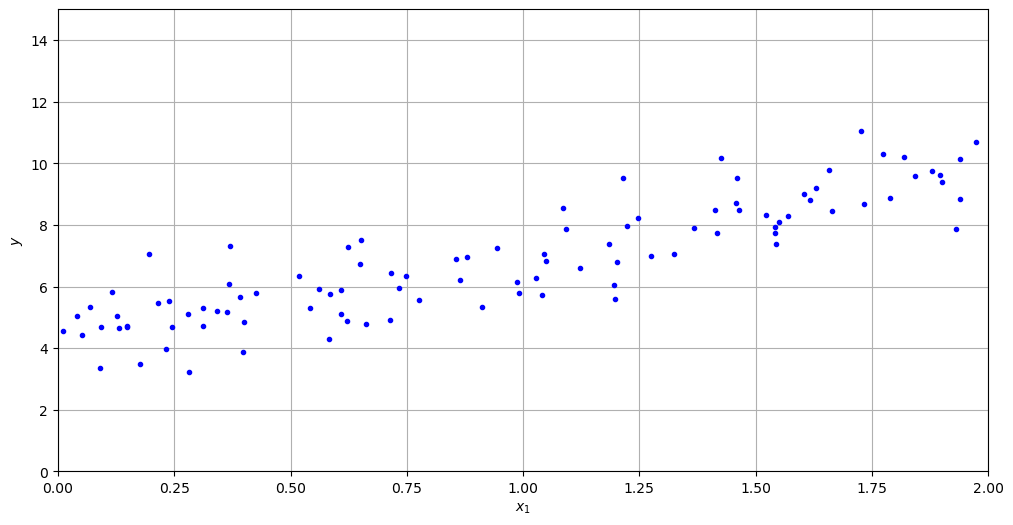

In [96]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.axis([0, 2, 0, 15])
plt.grid()

In [97]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

theta_best

array([[4.21509616],
       [2.77011339]])

In [98]:
X_new = np.array([[0], [2]])

X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best

y_predict

array([[4.21509616],
       [9.75532293]])

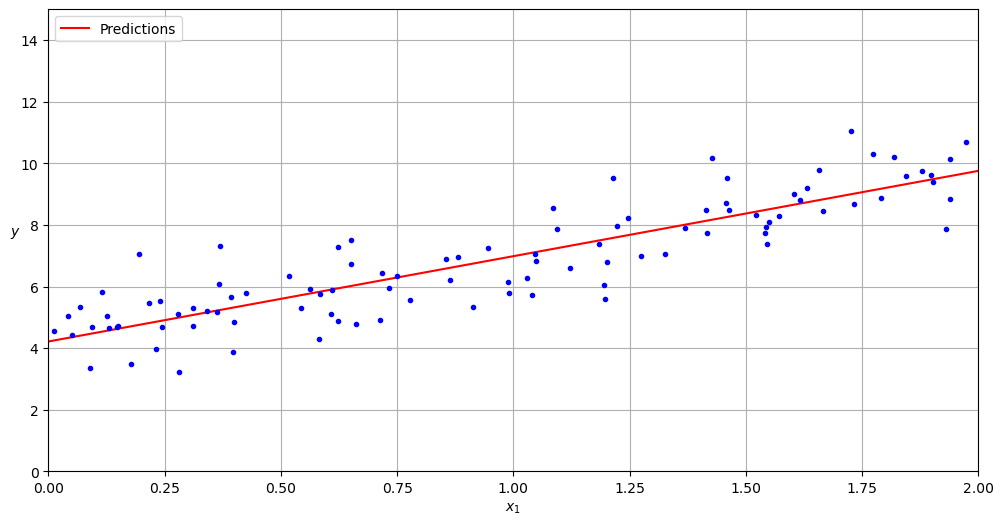

In [99]:
plt.figure(figsize=(12, 6))

plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)

plt.axis([0, 2, 0, 15])

plt.grid()

plt.legend(loc='upper left')

In [100]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [101]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [102]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [103]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

## Gradient Descent

### Batch Gradient Descent

In [104]:
eta = .1
n_epochs = 1000
m = len(X_b)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta -= eta * gradients
    
theta

array([[4.21509616],
       [2.77011339]])

[array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.7

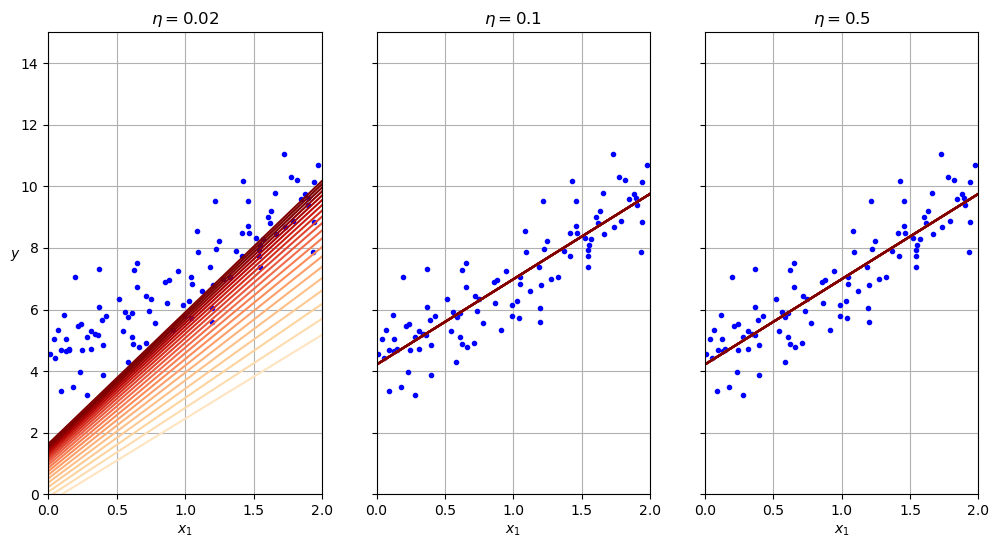

In [105]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    
    n_epochs = 1000
    n_shown = 20
    
    theta_path = []
    
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle='solid', color=color)
        
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        
        theta -= eta * gradients
        
        theta_path.append(theta)
        
    plt.xlabel('$x_1$')
    
    plt.axis([0, 2, 0, 15])
    
    plt.grid()
    
    plt.title(fr'$\eta = {eta}$')
    
    return theta_path

theta = np.random.randn(2, 1)

plt.figure(figsize=(12, 6))

plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0)

plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)

plt.gca().axes.yaxis.set_ticklabels([])

plt.subplot(133)

plt.gca().axes.yaxis.set_ticklabels([])

plot_gradient_descent(theta, eta=0.5)

### Stochastic Gradient Descent

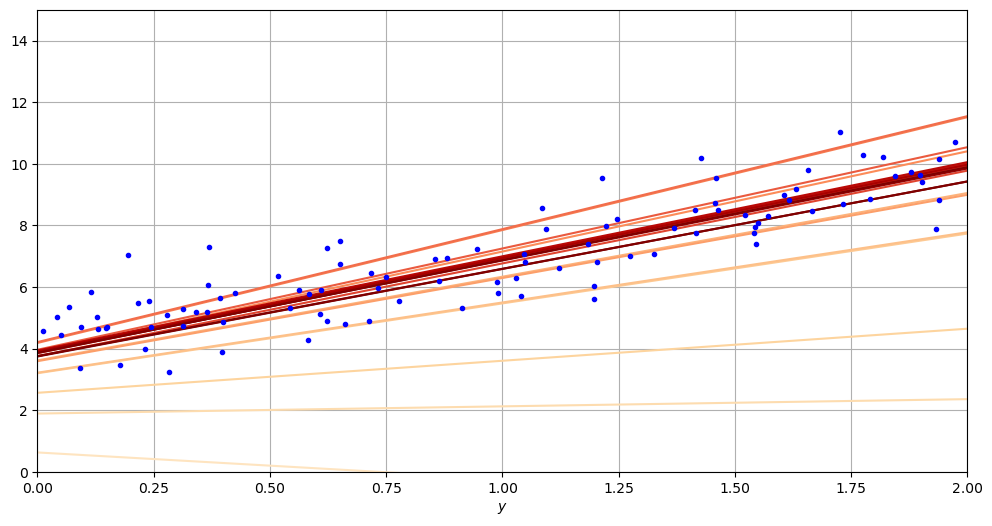

In [106]:
theta_path_sgd = []

m = len(X_b)
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

n_show = 20
plt.figure(figsize=(12, 6))

for epoch in range(n_epochs):
    for i in range(m):
        
        if epoch == 0 and i < n_show:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(i / n_show + .15))
            plt.plot(X_new, y_predict, color=color)
            
        random_index = np.random.randint(m)
        
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        
        gradients = 2 * xi.T @ (xi @ theta - yi)
        
        eta = learning_schedule(epoch * m + i)
        
        theta -= eta * gradients
        
        theta_path_sgd.append(theta)
        
        
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.xlabel('$y$', rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

        

In [107]:
theta

array([[4.18228368],
       [2.72737073]])

In [108]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,
                       tol=1e-5,
                       penalty=None,
                       eta0=.01,
                       n_iter_no_change=100,
                       random_state=SEED)

sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

### Mini batch gradient descent

theta_path_bgd (1000, 2, 1)
theta_path_sgd (5000, 2, 1)
theta_path_mgd (250, 2, 1)


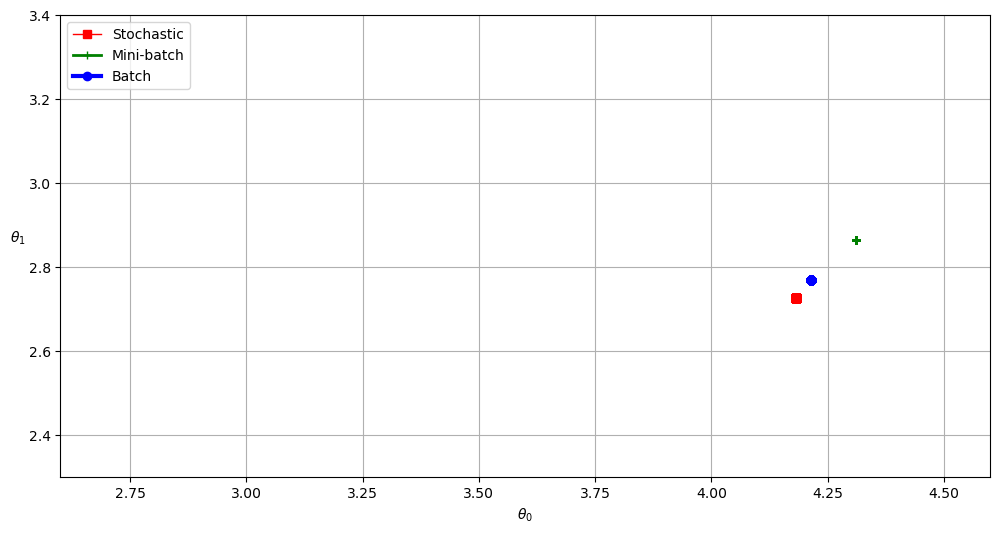

In [111]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

theta = np.random.randn(2, 1)

t0, t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, n_batches_per_epoch):
        idx = i * minibatch_size
        
        xi = X_b_shuffled[idx:idx + minibatch_size]
        yi = y_shuffled[idx:idx + minibatch_size]
        
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        
        eta = learning_schedule(i)
        
        theta -= eta * gradients
        
        theta_path_mgd.append(theta)
        
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

print('theta_path_bgd', theta_path_bgd.shape)
print('theta_path_sgd', theta_path_sgd.shape)
print('theta_path_mgd', theta_path_mgd.shape)

plt.figure(figsize=(12, 6))

plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s', linewidth=1,
         label='Stochastic')

plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'g-+', linewidth=2,
         label='Mini-batch')

plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'b-o', linewidth=3,
         label='Batch')

plt.legend(loc='upper left')

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$   ', rotation=0)

plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

## Ploynomial Regression

In [114]:
m = 100

X = 6 * np.random.rand(m, 1) - 3

y = .5 * X**2 + X + 2 + np.random.randn(m, 1)

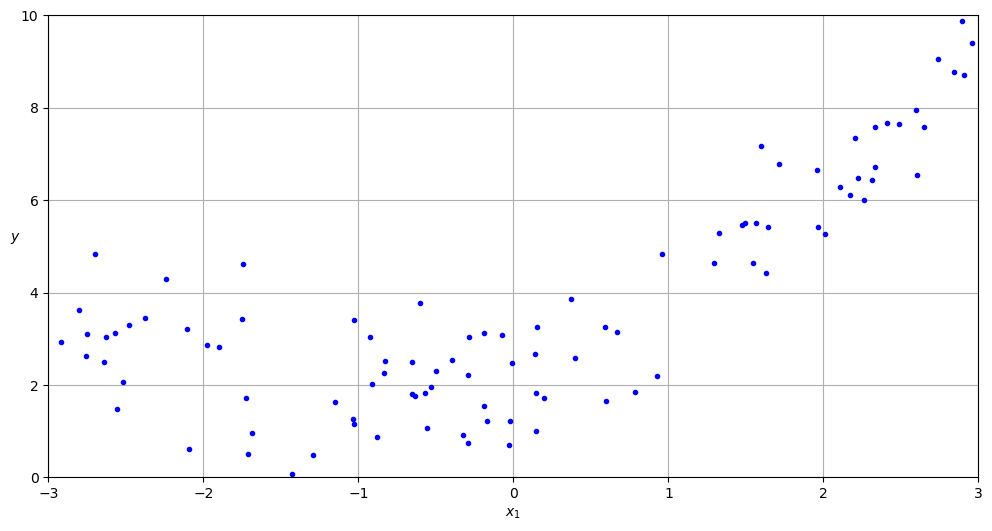

In [116]:
plt.figure(figsize=(12, 6))

plt.plot(X, y, 'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)

plt.axis([-3, 3, 0, 10])
plt.grid()

In [119]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

X_poly = poly_features.fit_transform(X)

X[0], X_poly[0]

(array([-1.71077296]), array([-1.71077296,  2.92674411]))

In [120]:
lin_reg = LinearRegression()

lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([2.18881902]), array([[0.9919573 , 0.48110674]]))

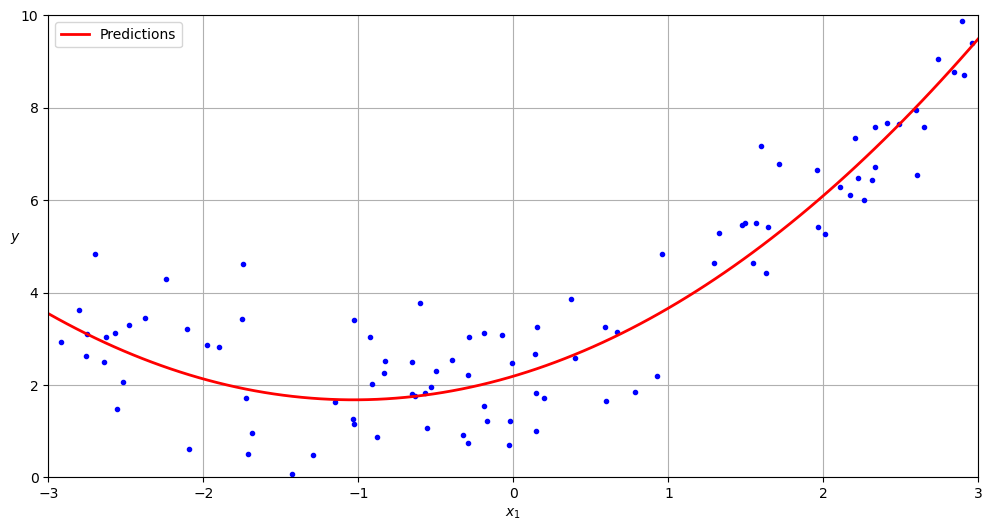

In [121]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

X_new_poly = poly_features.transform(X_new)

y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(12, 6))

plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')

plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)

plt.legend(loc='upper left')

plt.axis([-3, 3, 0, 10])
plt.grid()

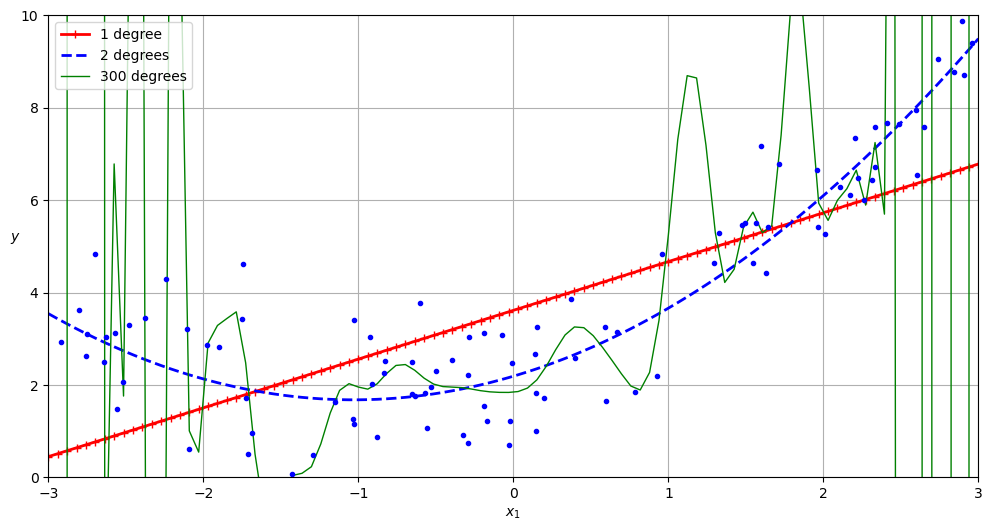

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(12, 6))

for style, width, degree in (('r-+', 2, 1), ('b--', 2, 2), ('g-', 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    std_scaler = StandardScaler()
    
    lin_reg = LinearRegression()
    
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    
    y_newbig = polynomial_regression.predict(X_new)
    
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, 'b.', linewidth=3)

plt.legend(loc='upper left')

plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)

plt.axis([-3, 3, 0, 10])
plt.grid()

## Learning Curves

(0.0, 80.0, 0.0, 2.5)

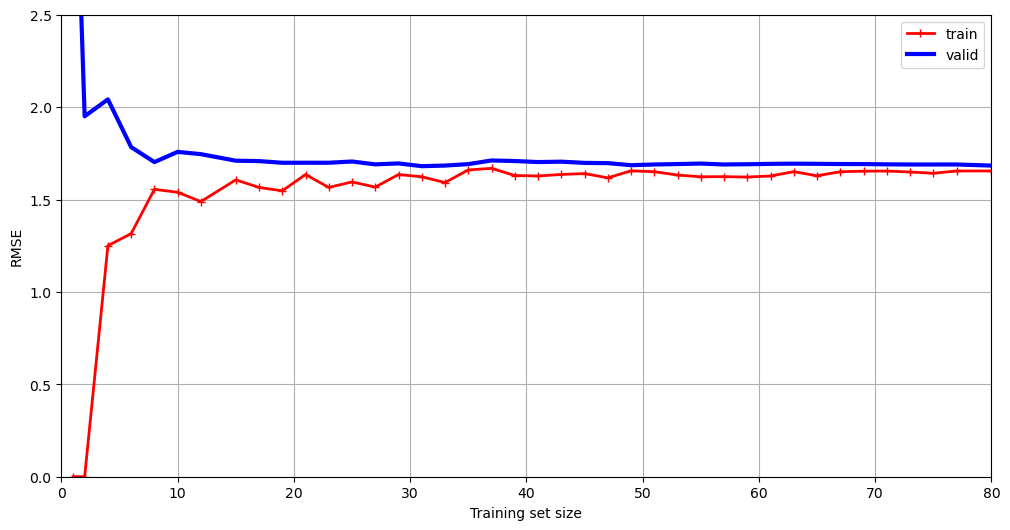

In [124]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), 
    X, y, 
    train_sizes=np.linspace(0.01, 1.0, 40), 
    cv=5,
    scoring='neg_root_mean_squared_error')

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(12, 6))

plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')

plt.xlabel('Training set size')
plt.ylabel('RMSE')

plt.grid()
plt.legend(loc='upper right')

plt.axis([0, 80, 0, 2.5])

In [125]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, 
    X, y, 
    train_sizes=np.linspace(0.01, 1.0, 40), 
    cv=5,
    scoring='neg_root_mean_squared_error')

(0.0, 80.0, 0.0, 2.5)

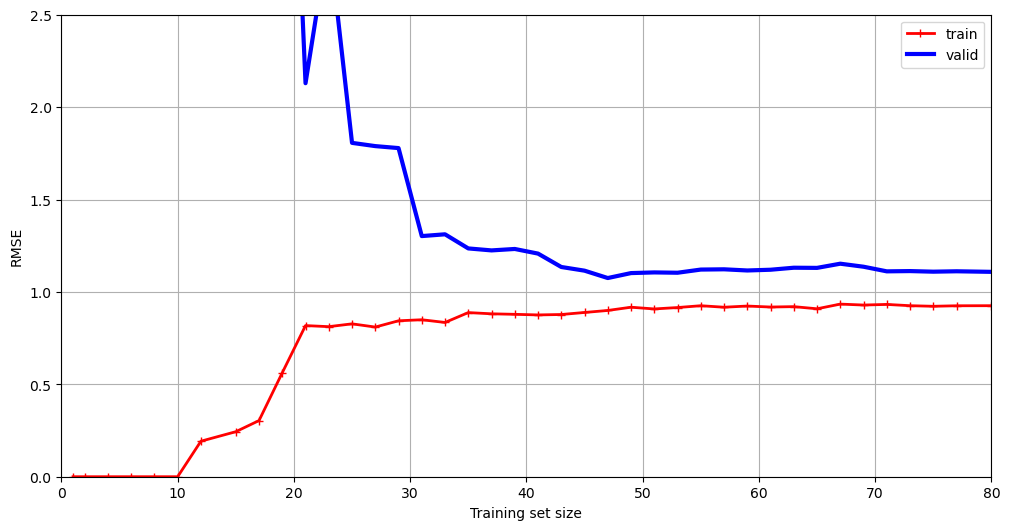

In [126]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(12, 6))

plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')

plt.legend(loc='upper right')

plt.xlabel('Training set size')
plt.ylabel('RMSE')

plt.grid()
plt.axis([0, 80, 0, 2.5])

## Regularized Linear Models

## Logistic Regression